In [48]:
# Import the libraries needed
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error,make_scorer, precision_score, f1_score ,accuracy_score, classification_report, confusion_matrix

In [43]:
# load our dataset
training = pd.read_csv("Training.csv")
testing = pd.read_csv("Testing.csv")
training.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# sample training set to increase the number of rows
sample_size = 2000

# Perform sampling with replacement
sampled_df = training.sample(n=sample_size, replace=True)
sampled_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1900,1,128,48,45,194,40.5,0.613,24,1
1395,5,73,60,0,0,26.8,0.268,27,0
67,2,109,92,0,0,42.7,0.845,54,0
1774,10,129,76,28,122,35.9,0.280,39,0
2107,1,103,80,11,82,19.4,0.491,22,0


In [6]:
# mergre the training data with the sampled data
new_df = pd.concat([training, sampled_df],axis=0)
new_df= new_df.reset_index(drop=True)
new_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
4455,5,166,72,19,175,25.8,0.587,51,1
4456,2,112,75,32,0,35.7,0.148,21,0
4457,6,92,92,0,0,19.9,0.188,28,0
4458,1,91,64,24,0,29.2,0.192,21,0


In [7]:
# check the missing values
new_df = new_df.dropna()
print(new_df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [8]:
new_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,4460.000000,4460.000000,4460.000000,4460.000000,4460.000000,4460.000000,4460.000000,4460.000000,4460.000000
mean,3.826233,121.387444,68.920404,20.217713,77.993946,31.909283,0.486102,32.855381,0.391704
std,3.277012,31.990686,19.134694,15.745364,113.827154,7.785760,0.366082,11.227886,0.488186
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,26.800000,0.248000,24.000000,0.000000
50%,3.000000,117.000000,70.000000,22.000000,23.000000,32.100000,0.372000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,32.000000,125.000000,36.100000,0.645000,39.250000,1.000000
max,17.000000,197.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4460 entries, 0 to 4459
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               4460 non-null   int64  
 1   Glucose                   4460 non-null   int64  
 2   BloodPressure             4460 non-null   int64  
 3   SkinThickness             4460 non-null   int64  
 4   Insulin                   4460 non-null   int64  
 5   BMI                       4460 non-null   float64
 6   DiabetesPedigreeFunction  4460 non-null   float64
 7   Age                       4460 non-null   int64  
 8   Outcome                   4460 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 313.7 KB


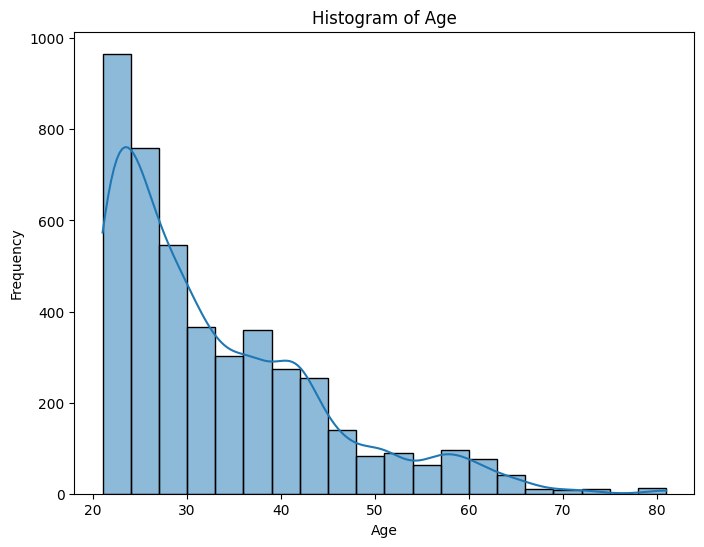

In [10]:
plt.figure(figsize=(8, 6))
sns.histplot(new_df['Age'], bins=20, kde=True)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

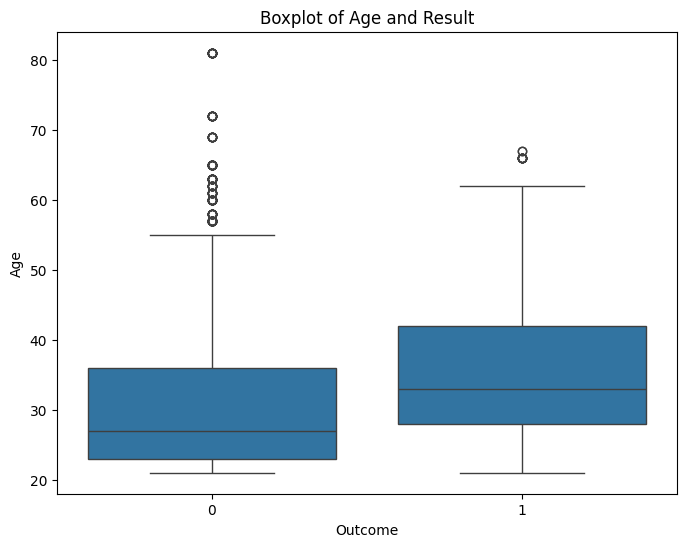

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='Age', data=new_df)
plt.title('Boxplot of Age and Result')
plt.xlabel('Outcome')
plt.ylabel('Age')
plt.show()

<Figure size 1000x800 with 0 Axes>

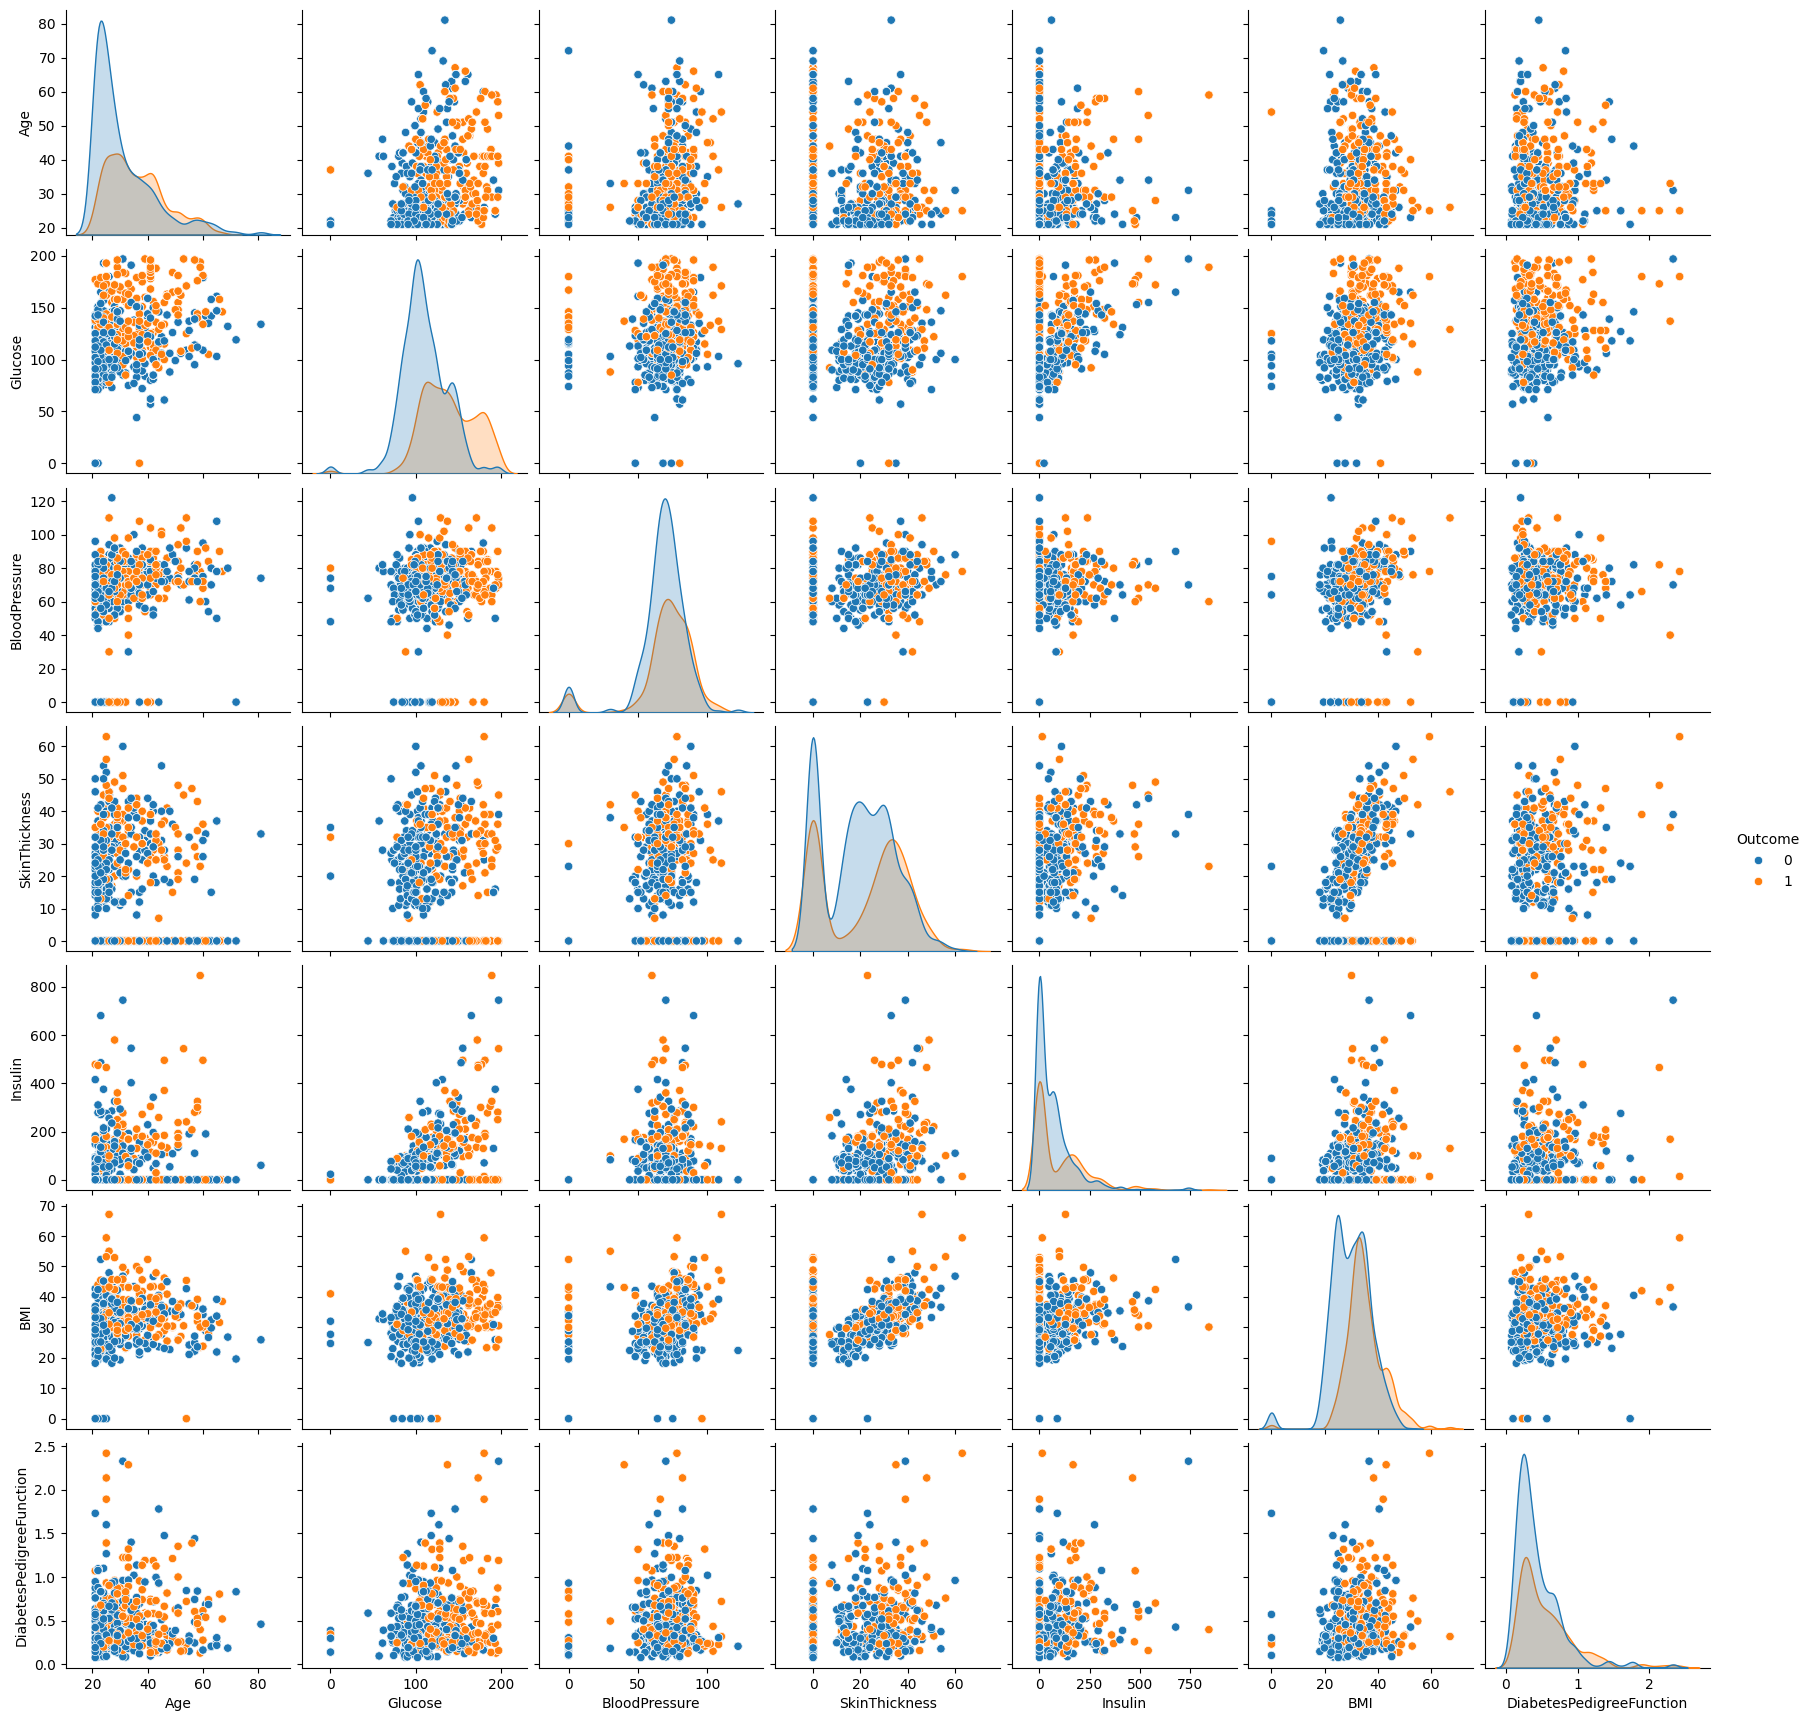

In [12]:
plt.figure(figsize=(10, 8))
sns.pairplot(new_df[['Age', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Outcome']], hue='Outcome')
plt.show()

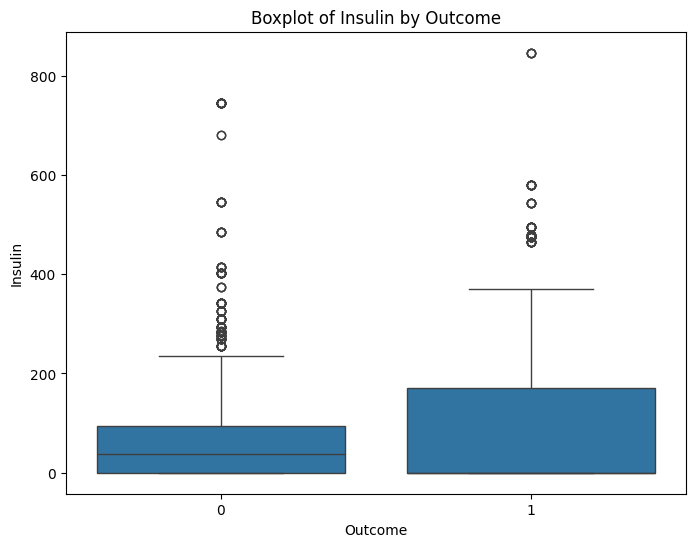

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='Insulin', data=new_df)
plt.title('Boxplot of Insulin by Outcome')
plt.xlabel('Outcome')
plt.ylabel('Insulin')
plt.show()

In [14]:
# Now let's train our model
X_train = new_df.drop(['Outcome'],axis=1)
y_train = new_df['Outcome']
X_test = testing.drop(['Outcome'],axis=1)
y_test = testing['Outcome']

In [15]:
# prepare some algorithms to see which one has the best performance
KN = KNeighborsClassifier()
LR = LogisticRegression()
DT = DecisionTreeClassifier()
svc = SVC()
algorithms = [KN,LR,DT,svc]

In [16]:
def compare_algorithms(X_train, y_train, algorithms, cv=10, scoring='accuracy'):
    """
    Compare the accuracies of multiple machine learning algorithms using cross-validation.

    Parameters:
    - X: Features (input variables) as a numpy array or pandas DataFrame.
    - y: Target variable as a numpy array or pandas Series.
    - algorithms: List of machine learning algorithms to compare.
    - cv: Number of cross-validation folds (default=10).
    - scoring: Evaluation metric to use (default='accuracy').

    Returns:
    - accuracies: Dictionary containing the accuracies of each algorithm.
    """

    accuracies = {}

    for algorithm in algorithms:
        algorithm.fit(X_train, y_train)
        scores = cross_val_score(algorithm, X_test, y_test, cv=cv, scoring=scoring)
        accuracies[type(algorithm).__name__] = np.mean(scores)

    return accuracies

In [17]:
def plot_accuracies(accuracies):
    """
    Plot a bar graph of accuracies for each algorithm.

    Parameters:
    - accuracies: Dictionary containing the accuracies of each algorithm.
    """

    algorithms = list(accuracies.keys())
    scores = list(accuracies.values())

    plt.figure(figsize=(10, 6))
    plt.barh(algorithms, scores, color='skyblue')
    plt.xlabel('Accuracy')
    plt.ylabel('Algorithm')
    plt.title('Accuracy of Machine Learning Algorithms')
    plt.xlim(0, 1)  # Set x-axis limits to range from 0 to 1
    plt.show()

d:\phyton\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\phyton\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:

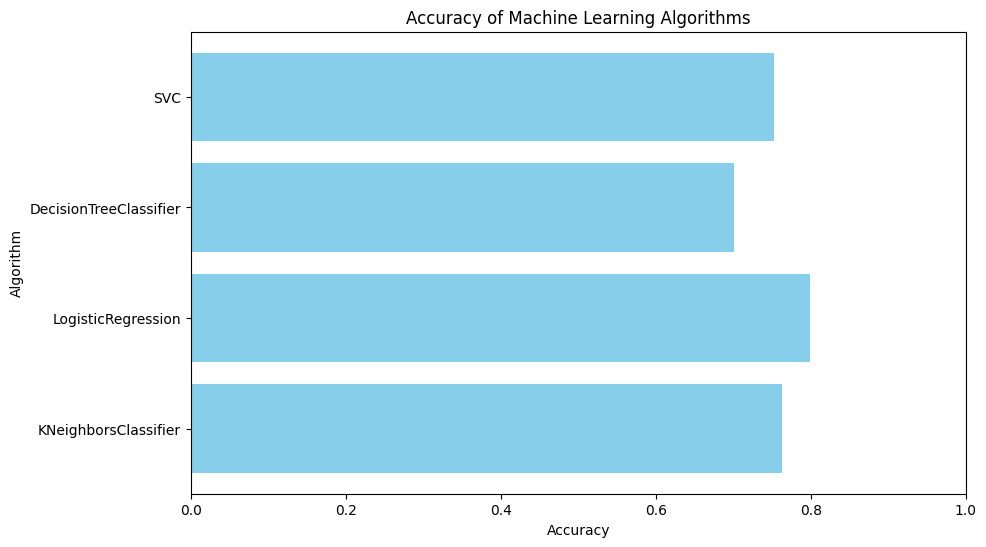

In [18]:
# Compare algorithms and plot accuracies
accuracies = compare_algorithms(X_train, y_train, algorithms)
plot_accuracies(accuracies)


In [19]:
print("Accuracies:", accuracies)

Accuracies: {'KNeighborsClassifier': 0.7624731182795699, 'LogisticRegression': 0.7989247311827956, 'DecisionTreeClassifier': 0.7009677419354838, 'SVC': 0.7531182795698925}


In [20]:
model = LR.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.801948051948052


d:\phyton\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       215
           1       0.69      0.62      0.66        93

    accuracy                           0.80       308
   macro avg       0.77      0.75      0.76       308
weighted avg       0.80      0.80      0.80       308



In [22]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[189  26]
 [ 35  58]]


In [23]:
outcome_counts = new_df['Outcome'].value_counts()

# Print the counts
print("Counts of ones and zeros in the 'Outcome' column:")
print(outcome_counts)

Counts of ones and zeros in the 'Outcome' column:
Outcome
0    2713
1    1747
Name: count, dtype: int64


In [24]:
# improve performance using the GridSearchCV technique
param_grid = {
    'penalty': ['l1', 'l2','13','14'],  # Regularization penalty
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'saga']  # Algorithm for optimization
}

grid_search = GridSearchCV(estimator=LR, param_grid=param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

d:\phyton\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\phyton\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\phyton\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\phyton\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\phyton\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\phyton\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\phyton\Lib\site-pac

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', '13', '14'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [25]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best cross-validation score
best_score = grid_search.best_score_
print("Best Cross-Validation Score:", best_score)

# Evaluate the model with the best hyperparameters on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test Set Score:", test_score)

Best Hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Score: 0.7446188340807176
Test Set Score: 0.801948051948052
